In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('TSLA.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-10,52.444000,52.599998,51.563999,51.830002,51.830002,13054500
1,2015-07-13,52.450001,52.509998,51.209999,52.431999,52.431999,14801500
2,2015-07-14,52.419998,53.198002,52.102001,53.130001,53.130001,9538000
3,2015-07-15,53.348000,53.498001,52.416000,52.627998,52.627998,10108000
4,2015-07-16,52.844002,53.439999,52.632000,53.335999,53.335999,8080000


In [2]:
print(type(df.Date[0]))
print(df.shape,'\n',df.iloc[1190]['Date'],'\n')
df.info()

<class 'str'>
(1259, 7) 
 2020-04-01 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [3]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,64.594124,65.883341,63.272302,64.642060,64.642060,3.979012e+07
std,33.400757,34.457933,32.308613,33.518742,33.518742,2.928062e+07
min,28.464001,30.993999,28.209999,28.733999,28.733999,3.540000e+06
25%,45.861999,46.425002,45.063001,45.887001,45.887001,2.158075e+07
50%,56.765999,57.888000,55.776001,56.945999,56.945999,3.081300e+07
75%,67.962001,69.039001,66.736000,67.790001,67.790001,4.658400e+07
max,281.002014,285.899994,270.256012,278.855988,278.855988,3.046940e+08


In [4]:
dataframe = df['Close']
dataset = dataframe.values
dataframe.head(10)

0    51.830002
1    52.431999
2    53.130001
3    52.627998
4    53.335999
5    54.931999
6    56.452000
7    53.354000
8    53.574001
9    53.439999
Name: Close, dtype: float64

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras import optimizers
import time

In [6]:
# The data is normalized to the range 0-1, and finally converted into a column vector
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset.reshape(-1, 1))
# print(dataset)

In [7]:
# Split the data
train_size = 1191
test_size = len(dataset)-1191
train, test = dataset[0: train_size], dataset[train_size: len(dataset)]

In [20]:
lag_1 = 1
lag_7 = 7
lag_14 = 14

In [8]:
def creat_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i: (i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i+look_back])
    return np.array(dataX), np.array(dataY)

In [9]:
look_back = 7
trainX, trainY = creat_dataset(train, look_back)
testX, testY = creat_dataset(test, look_back)
print(trainX.shape)

(1183, 7, 1)


In [10]:
#build the model

model = Sequential()
model.add(LSTM(units=50,input_shape=(trainX.shape[1], 1),return_sequences=True))
#model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
#model.add(Dropout(0.2))
model.add(LSTM(100, return_sequences=True))
#model.add(Dropout(0.2))
model.add(LSTM(300, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(100))
model.add(Dense(1, activation='relu'))
model.compile(loss='mean_squared_error', optimizer='Adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 7, 50)             10400     
                                                                 
 lstm_1 (LSTM)               (None, 7, 50)             20200     
                                                                 
 lstm_2 (LSTM)               (None, 7, 100)            60400     
                                                                 
 lstm_3 (LSTM)               (None, 300)               481200    
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense (Dense)               (None, 100)               30100     
                                                                 
 dense_1 (Dense)             (None, 1)                 1

In [45]:
history = model.fit(trainX, trainY, batch_size=64, epochs=50, validation_split=0.1, verbose=2)

Epoch 1/50
17/17 - 9s - loss: 0.0033 - val_loss: 0.0403 - 9s/epoch - 522ms/step
Epoch 2/50
17/17 - 0s - loss: 0.0018 - val_loss: 0.0354 - 226ms/epoch - 13ms/step
Epoch 3/50
17/17 - 0s - loss: 7.1720e-04 - val_loss: 0.0046 - 226ms/epoch - 13ms/step
Epoch 4/50
17/17 - 0s - loss: 2.4457e-04 - val_loss: 0.0044 - 240ms/epoch - 14ms/step
Epoch 5/50
17/17 - 0s - loss: 2.1115e-04 - val_loss: 0.0043 - 249ms/epoch - 15ms/step
Epoch 6/50
17/17 - 0s - loss: 1.8358e-04 - val_loss: 0.0044 - 189ms/epoch - 11ms/step
Epoch 7/50
17/17 - 0s - loss: 1.8801e-04 - val_loss: 0.0042 - 179ms/epoch - 11ms/step
Epoch 8/50
17/17 - 0s - loss: 2.1264e-04 - val_loss: 0.0041 - 183ms/epoch - 11ms/step
Epoch 9/50
17/17 - 0s - loss: 1.9471e-04 - val_loss: 0.0040 - 184ms/epoch - 11ms/step
Epoch 10/50
17/17 - 0s - loss: 1.8828e-04 - val_loss: 0.0040 - 176ms/epoch - 10ms/step
Epoch 11/50
17/17 - 0s - loss: 1.8049e-04 - val_loss: 0.0040 - 168ms/epoch - 10ms/step
Epoch 12/50
17/17 - 0s - loss: 1.8104e-04 - val_loss: 0.0040 -

In [46]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

2/2 [==============================] - 0s 9ms/step


In [47]:
# Denormalize to restore the original data range
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)

In [48]:
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict[:, 0]))
print('Train Sccore %.2f RMSE' %(trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict[:, 0]))
print('Train Sccore %.2f RMSE' %(testScore))
dropout_nodrop_64 = [trainScore,testScore]

Train Sccore 3.87 RMSE
Train Sccore 22.57 RMSE


In [49]:
# Create a NumPy array trainPredictPlot of the same shape as the original dataset dataset and fill it with the model's training predictions trainPredict .
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:] = np.nan
trainPredictPlot = np.reshape(trainPredictPlot, (dataset.shape[0], 1))
trainPredictPlot[look_back: len(trainPredict)+look_back, :] = trainPredict
# print(trainPredictPlot.shape,trainPredictPlot[look_back-2: look_back+3, :])

(1259, 1) [[        nan]
 [        nan]
 [55.54469681]
 [55.76024246]
 [55.25317383]]


In [50]:
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:] = np.nan
testPredictPlot = np.reshape(testPredictPlot, (dataset.shape[0], 1))
testPredictPlot[len(trainPredict)+(look_back*2)+1: len(dataset)-1, :] = testPredict

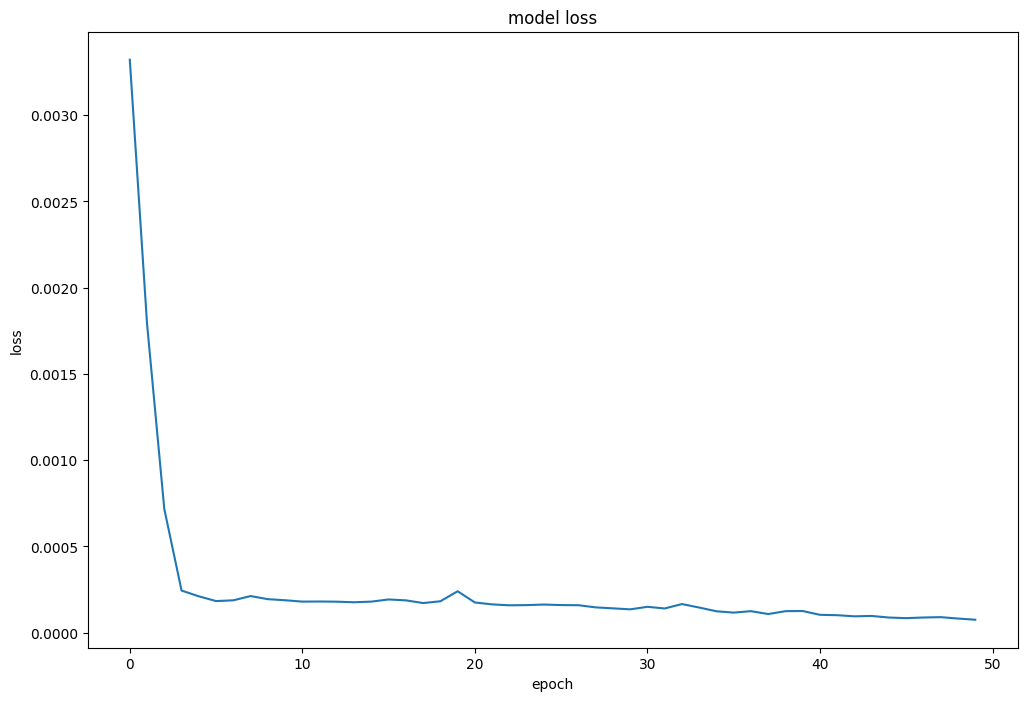

In [51]:
fig1 = plt.figure(figsize=(12, 8))
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

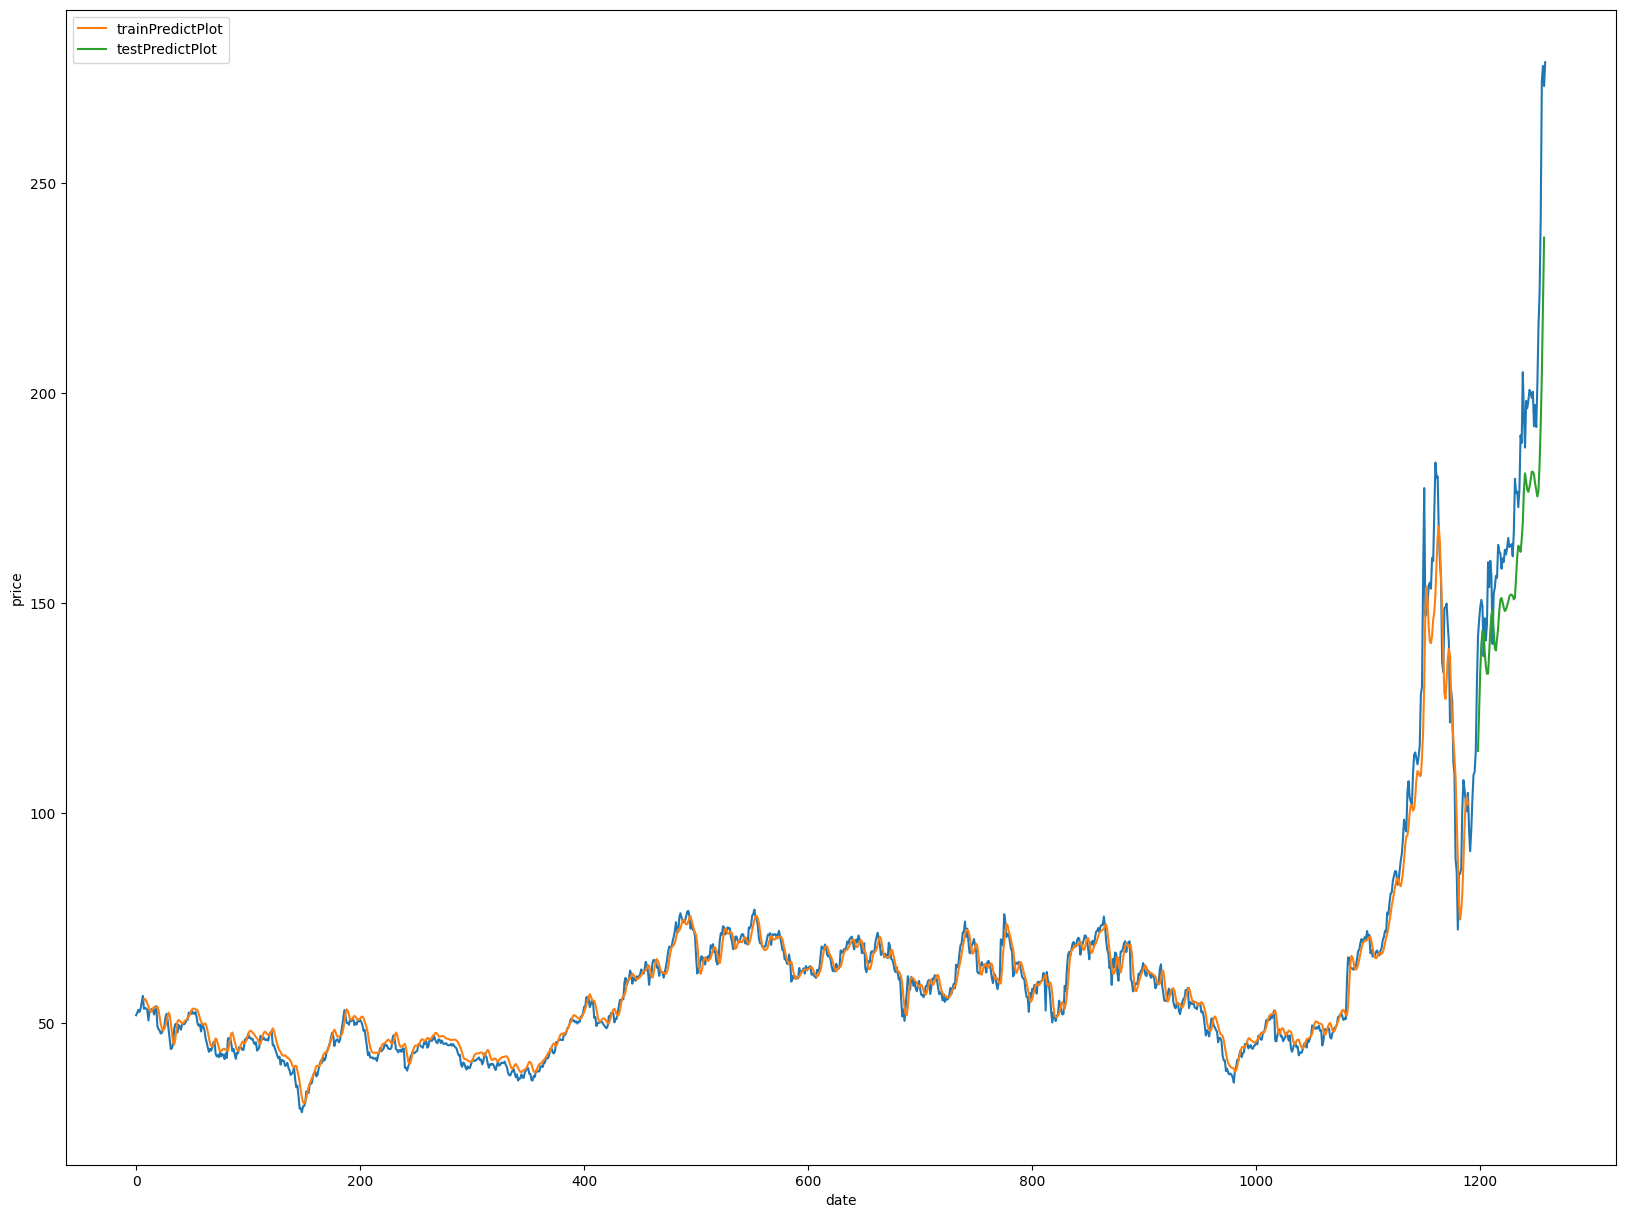

In [52]:
fig2 = plt.figure(figsize=(20, 15))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot,label='trainPredictPlot')
plt.plot(testPredictPlot,label='testPredictPlot')
plt.legend()
plt.ylabel('price')
plt.xlabel('date')
plt.show()

In [43]:
dataset = dataframe.values
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset.reshape(-1, 1))
train_size = 1191
test_size = len(dataset)-1191
train, test = dataset[0: train_size], dataset[train_size: len(dataset)]
trainX, trainY = creat_dataset(train, look_back)
testX, testY = creat_dataset(test, look_back)
# print(trainX.shape)
model = Sequential()
model.add(LSTM(units=50,input_shape=(trainX.shape[1], 1),return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(300, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(100))
model.add(Dense(1, activation='relu'))
model.compile(loss='mean_squared_error', optimizer='Adam')
# model.summary()
history = model.fit(trainX, trainY, batch_size=64, epochs=50, validation_split=0.1, verbose=2)
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict[:, 0]))
print('Train Sccore %.2f RMSE' %(trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict[:, 0]))
print('Train Sccore %.2f RMSE' %(testScore))

trainPredict_final =  testPredict
RMSE_drop_64 = [trainScore,testScore]


Epoch 1/50
17/17 - 11s - loss: 0.0032 - val_loss: 0.0393 - 11s/epoch - 654ms/step
Epoch 2/50
17/17 - 1s - loss: 0.0016 - val_loss: 0.0213 - 1s/epoch - 71ms/step
Epoch 3/50
17/17 - 1s - loss: 4.0388e-04 - val_loss: 0.0051 - 1s/epoch - 87ms/step
Epoch 4/50
17/17 - 2s - loss: 2.3646e-04 - val_loss: 0.0041 - 2s/epoch - 132ms/step
Epoch 5/50
17/17 - 1s - loss: 2.0884e-04 - val_loss: 0.0040 - 1s/epoch - 72ms/step
Epoch 6/50
17/17 - 1s - loss: 1.9976e-04 - val_loss: 0.0040 - 1s/epoch - 70ms/step
Epoch 7/50
17/17 - 1s - loss: 2.0088e-04 - val_loss: 0.0041 - 1s/epoch - 72ms/step
Epoch 8/50
17/17 - 1s - loss: 2.1448e-04 - val_loss: 0.0041 - 1s/epoch - 72ms/step
Epoch 9/50
17/17 - 1s - loss: 2.0757e-04 - val_loss: 0.0038 - 1s/epoch - 74ms/step
Epoch 10/50
17/17 - 1s - loss: 2.2896e-04 - val_loss: 0.0053 - 1s/epoch - 71ms/step
Epoch 11/50
17/17 - 1s - loss: 2.4219e-04 - val_loss: 0.0040 - 1s/epoch - 73ms/step
Epoch 12/50
17/17 - 1s - loss: 1.9134e-04 - val_loss: 0.0039 - 1s/epoch - 72ms/step
Epoch

In [54]:
dataset = dataframe.values
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset.reshape(-1, 1))
train_size = 1191
test_size = len(dataset)-1191
train, test = dataset[0: train_size], dataset[train_size: len(dataset)]
trainX, trainY = creat_dataset(train, look_back)
testX, testY = creat_dataset(test, look_back)
# print(trainX.shape)
model = Sequential()
model.add(LSTM(units=50,input_shape=(trainX.shape[1], 1),return_sequences=True))
# model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
# model.add(Dropout(0.2))
model.add(LSTM(100, return_sequences=True))
# model.add(Dropout(0.2))
model.add(LSTM(300, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(100))
model.add(Dense(1, activation='relu'))
model.compile(loss='mean_squared_error', optimizer='Adam')
# model.summary()
history = model.fit(trainX, trainY, batch_size=10, epochs=50, validation_split=0.1, verbose=2)
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict[:, 0]))
print('Train Sccore %.2f RMSE' %(trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict[:, 0]))
print('Train Sccore %.2f RMSE' %(testScore))

RMSE_nodrop_10 = [trainScore,testScore]


Epoch 1/50
107/107 - 10s - loss: 6.7775e-04 - val_loss: 0.0086 - 10s/epoch - 95ms/step
Epoch 2/50
107/107 - 1s - loss: 2.7358e-04 - val_loss: 0.0035 - 981ms/epoch - 9ms/step
Epoch 3/50
107/107 - 1s - loss: 2.2787e-04 - val_loss: 0.0041 - 934ms/epoch - 9ms/step
Epoch 4/50
107/107 - 1s - loss: 2.0816e-04 - val_loss: 0.0038 - 942ms/epoch - 9ms/step
Epoch 5/50
107/107 - 1s - loss: 2.0548e-04 - val_loss: 0.0032 - 942ms/epoch - 9ms/step
Epoch 6/50
107/107 - 1s - loss: 1.8472e-04 - val_loss: 0.0029 - 943ms/epoch - 9ms/step
Epoch 7/50
107/107 - 1s - loss: 1.8445e-04 - val_loss: 0.0033 - 1s/epoch - 14ms/step
Epoch 8/50
107/107 - 1s - loss: 1.4914e-04 - val_loss: 0.0033 - 1s/epoch - 10ms/step
Epoch 9/50
107/107 - 1s - loss: 1.4813e-04 - val_loss: 0.0026 - 913ms/epoch - 9ms/step
Epoch 10/50
107/107 - 1s - loss: 1.4750e-04 - val_loss: 0.0020 - 911ms/epoch - 9ms/step
Epoch 11/50
107/107 - 1s - loss: 1.3186e-04 - val_loss: 0.0017 - 925ms/epoch - 9ms/step
Epoch 12/50
107/107 - 1s - loss: 1.1980e-04 -

In [55]:
dataset = dataframe.values
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset.reshape(-1, 1))
train_size = 1191
test_size = len(dataset)-1191
train, test = dataset[0: train_size], dataset[train_size: len(dataset)]
trainX, trainY = creat_dataset(train, look_back)
testX, testY = creat_dataset(test, look_back)
# print(trainX.shape)
model = Sequential()
model.add(LSTM(units=50,input_shape=(trainX.shape[1], trainX.shape[2]),return_sequences=True))
# model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
# model.add(Dropout(0.2))
model.add(LSTM(100, return_sequences=True))
# model.add(Dropout(0.2))
model.add(LSTM(300, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(100))
model.add(Dense(1, activation='relu'))
model.compile(loss='mean_squared_error', optimizer='Adam')
# model.summary()
history = model.fit(trainX, trainY, batch_size=30, epochs=50, validation_split=0.1, verbose=2)
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict[:, 0]))
print('Train Sccore %.2f RMSE' %(trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict[:, 0]))
print('Train Sccore %.2f RMSE' %(testScore))

RMSE_nodrop_30 = [trainScore,testScore]


Epoch 1/50
36/36 - 9s - loss: 0.0123 - val_loss: 0.0953 - 9s/epoch - 242ms/step
Epoch 2/50
36/36 - 0s - loss: 0.0123 - val_loss: 0.0953 - 346ms/epoch - 10ms/step
Epoch 3/50
36/36 - 0s - loss: 0.0123 - val_loss: 0.0953 - 316ms/epoch - 9ms/step
Epoch 4/50
36/36 - 0s - loss: 0.0123 - val_loss: 0.0953 - 324ms/epoch - 9ms/step
Epoch 5/50
36/36 - 0s - loss: 0.0123 - val_loss: 0.0953 - 324ms/epoch - 9ms/step
Epoch 6/50
36/36 - 0s - loss: 0.0123 - val_loss: 0.0953 - 319ms/epoch - 9ms/step
Epoch 7/50
36/36 - 0s - loss: 0.0123 - val_loss: 0.0953 - 331ms/epoch - 9ms/step
Epoch 8/50
36/36 - 0s - loss: 0.0123 - val_loss: 0.0953 - 349ms/epoch - 10ms/step
Epoch 9/50
36/36 - 0s - loss: 0.0123 - val_loss: 0.0953 - 322ms/epoch - 9ms/step
Epoch 10/50
36/36 - 0s - loss: 0.0123 - val_loss: 0.0953 - 333ms/epoch - 9ms/step
Epoch 11/50
36/36 - 0s - loss: 0.0123 - val_loss: 0.0953 - 318ms/epoch - 9ms/step
Epoch 12/50
36/36 - 0s - loss: 0.0123 - val_loss: 0.0953 - 322ms/epoch - 9ms/step
Epoch 13/50
36/36 - 0s -

In [56]:
Score_compare = [dropout_nodrop_64,
RMSE_nodrop_10,
RMSE_nodrop_30,
RMSE_drop_64]
Score_compare = pd.DataFrame(Score_compare)
# print(Score_compare1)
# print(Score_compare1[0])

In [202]:
# Score_compare = pd.DataFrame([ [0.00704090063324104, 0.04813220636598323], [0.007642569640095808, 0.046490231001649084], [0.01098362425636774, 0.0820703601019718]])
# Score_compare1 = Score_compare.iloc[[1, 2]]
# print(Score_compare1)

          0        1
1  0.007643  0.04649
2  0.010984  0.08207


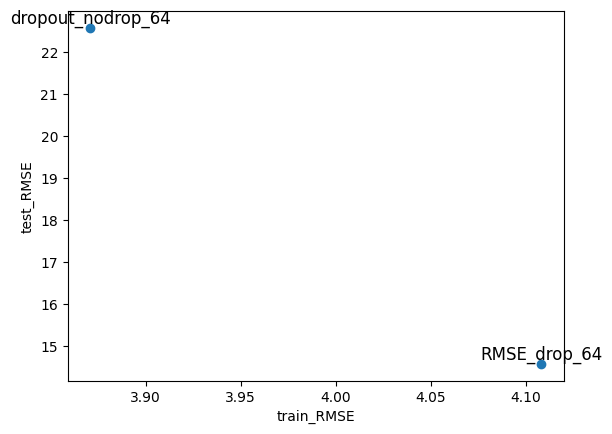

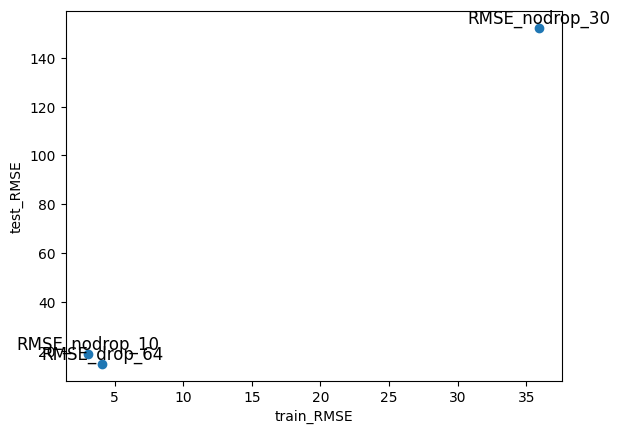

In [57]:
import pandas as pd
# Score_compare = pd.DataFrame([[2.57321974167287, 17.168238982940675], [0.01098362425636774, 0.0820703601019718]])
Score_compare1 = Score_compare.iloc[[0, 3]]
import matplotlib.pyplot as plt

# Score_compare2 = pd.DataFrame([ [0.00704090063324104, 0.04813220636598323], [0.007642569640095808, 0.046490231001649084], [0.01098362425636774, 0.0820703601019718]])
Score_compare2 = Score_compare[1:]
labels = ['dropout_nodrop_64', 'RMSE_drop_64']
plt.scatter(Score_compare1[0],Score_compare1[1])
plt.xlabel('train_RMSE')
plt.ylabel('test_RMSE')
for i, label in enumerate(labels):
    plt.text(Score_compare1.iloc[i,0], Score_compare1.iloc[i,1], label, fontsize=12, ha='center', va='bottom')
plt.show()

labels = ['RMSE_nodrop_10','RMSE_nodrop_30','RMSE_drop_64']
plt.scatter(Score_compare2[0],Score_compare2[1])
plt.xlabel('train_RMSE')
plt.ylabel('test_RMSE')
for i, label in enumerate(labels):
    plt.text(Score_compare2.iloc[i,0], Score_compare2.iloc[i,1], label, fontsize=12, ha='center', va='bottom')
plt.show()

### More features

In [11]:
data1 = df.iloc[:,1:]
output_data = df.iloc[:,3]
print(data1,output_data)

            Open        High         Low       Close   Adj Close     Volume
0      52.444000   52.599998   51.563999   51.830002   51.830002   13054500
1      52.450001   52.509998   51.209999   52.431999   52.431999   14801500
2      52.419998   53.198002   52.102001   53.130001   53.130001    9538000
3      53.348000   53.498001   52.416000   52.627998   52.627998   10108000
4      52.844002   53.439999   52.632000   53.335999   53.335999    8080000
...          ...         ...         ...         ...         ...        ...
1254  244.296005  245.600006  237.119995  241.731995  241.731995   86250500
1255  255.337997  275.558014  253.207993  274.316010  274.316010  102849500
1256  281.002014  285.899994  267.342010  277.971985  277.971985  107448500
1257  281.000000  283.451996  262.268005  273.175995  273.175995   81556500
1258  279.398010  281.712006  270.256012  278.855988  278.855988   58588000

[1259 rows x 6 columns] 0        51.563999
1        51.209999
2        52.102001
3     

In [27]:
dataset = data1
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# print(dataset)
train_size = 1191
test_size = len(dataset)-1191
train, test = dataset[0: train_size], dataset[train_size: len(dataset)]
trainX, trainY = creat_dataset(train, look_back)
testX, testY = creat_dataset(test, look_back)
# print(trainY.shape,testY.shape)
dataY = []
for i in range(len(dataset)-look_back-1):
  dataY.append(dataset[i+look_back,3])
dataY = np.array(dataY)
trainY = dataY[8: train_size]
testY = dataY[train_size: len(dataset)]
# print(testY.shape,test_size,trainY.shape,dataY.shape)
model = Sequential()
model.add(LSTM(units=50,input_shape=(trainX.shape[1], trainX.shape[2]),return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(300, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(100))
model.add(Dense(1, activation='relu'))
model.compile(loss='mean_squared_error', optimizer='Adam')

In [28]:
history = model.fit(trainX, trainY, batch_size=64, epochs=50, validation_split=0.1, verbose=2)
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

Epoch 1/50
17/17 - 11s - loss: 0.0030 - val_loss: 0.0311 - 11s/epoch - 646ms/step
Epoch 2/50
17/17 - 2s - loss: 0.0012 - val_loss: 0.0185 - 2s/epoch - 143ms/step
Epoch 3/50
17/17 - 2s - loss: 6.0724e-04 - val_loss: 0.0132 - 2s/epoch - 141ms/step
Epoch 4/50
17/17 - 2s - loss: 5.2034e-04 - val_loss: 0.0123 - 2s/epoch - 117ms/step
Epoch 5/50
17/17 - 2s - loss: 4.6395e-04 - val_loss: 0.0136 - 2s/epoch - 132ms/step
Epoch 6/50
17/17 - 2s - loss: 4.9457e-04 - val_loss: 0.0115 - 2s/epoch - 106ms/step
Epoch 7/50
17/17 - 2s - loss: 4.7257e-04 - val_loss: 0.0121 - 2s/epoch - 125ms/step
Epoch 8/50
17/17 - 2s - loss: 4.5354e-04 - val_loss: 0.0119 - 2s/epoch - 144ms/step
Epoch 9/50
17/17 - 2s - loss: 4.4006e-04 - val_loss: 0.0116 - 2s/epoch - 138ms/step
Epoch 10/50
17/17 - 1s - loss: 4.5222e-04 - val_loss: 0.0122 - 1s/epoch - 72ms/step
Epoch 11/50
17/17 - 1s - loss: 4.3879e-04 - val_loss: 0.0127 - 1s/epoch - 72ms/step
Epoch 12/50
17/17 - 1s - loss: 4.7284e-04 - val_loss: 0.0123 - 1s/epoch - 74ms/ste

In [21]:
# print(type(trainPredict))
# print(type(data1))
# print(type(data1.iloc[:,0:3].values))
# print(data1.iloc[:,4:].values)

<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
[[5.18300020e+01 1.30545000e+07]
 [5.24319990e+01 1.48015000e+07]
 [5.31300010e+01 9.53800000e+06]
 ...
 [2.77971985e+02 1.07448500e+08]
 [2.73175995e+02 8.15565000e+07]
 [2.78855988e+02 5.85880000e+07]]


In [29]:
def trans(X):
  X = np.c_[data1.iloc[8:1191,0:3].values, X, data1.iloc[8:1191,4:].values]
  Y = scaler.inverse_transform(X)
  return Y[:,3]
def trans_test(X):
  X = np.c_[data1.iloc[1199:,0:3].values, X, data1.iloc[1199:,4:].values]
  Y = scaler.inverse_transform(X)
  return Y[:,3]
trainPredict1 = trans(trainPredict)
trainY1 = trans(trainY)
testPredict1 = trans_test(testPredict)
testY1 = trans_test(testY)

In [33]:
trainScore = math.sqrt(mean_squared_error(trainY1, trainPredict1))
print('Train Sccore %.2f RMSE' %(trainScore))
testScore = math.sqrt(mean_squared_error(testY1, testPredict1))
print('Train Sccore %.2f RMSE' %(testScore))

Train Sccore 9.88 RMSE
Train Sccore 47.34 RMSE


In [ ]:
Score_compare3 = Score_compare[1]
RMSE_nodrop_30 = [trainScore,testScore]
labels = ['dropout_nodrop_64', 'RMSE_drop_64']
plt.scatter(Score_compare1[0],Score_compare1[1])
plt.xlabel('train_RMSE')
plt.ylabel('test_RMSE')
plt.show()

(1251, 1)


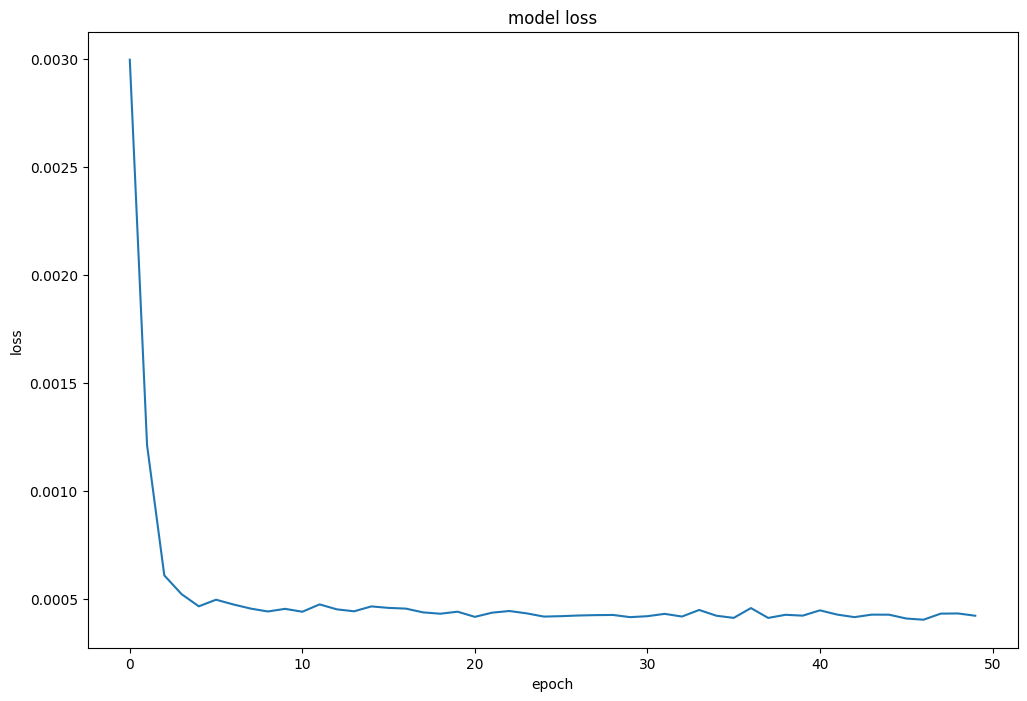

In [40]:
trainPredictPlot = np.empty_like(dataY)
trainPredictPlot[:] = np.nan
trainPredictPlot = np.reshape(trainPredictPlot, (dataY.shape[0], 1))
print(trainPredictPlot.shape)
trainPredictPlot[look_back: len(trainPredict1)+look_back,:] = trainPredict1.reshape(-1,1)
testPredictPlot = np.empty_like(dataY)
testPredictPlot[:] = np.nan
testPredictPlot = np.reshape(testPredictPlot, (dataY.shape[0], 1))
testPredictPlot[len(trainPredict1)-8+(look_back*2)+1: len(dataY)-1, :] = testPredict1.reshape(-1,1)
fig1 = plt.figure(figsize=(12, 8))
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

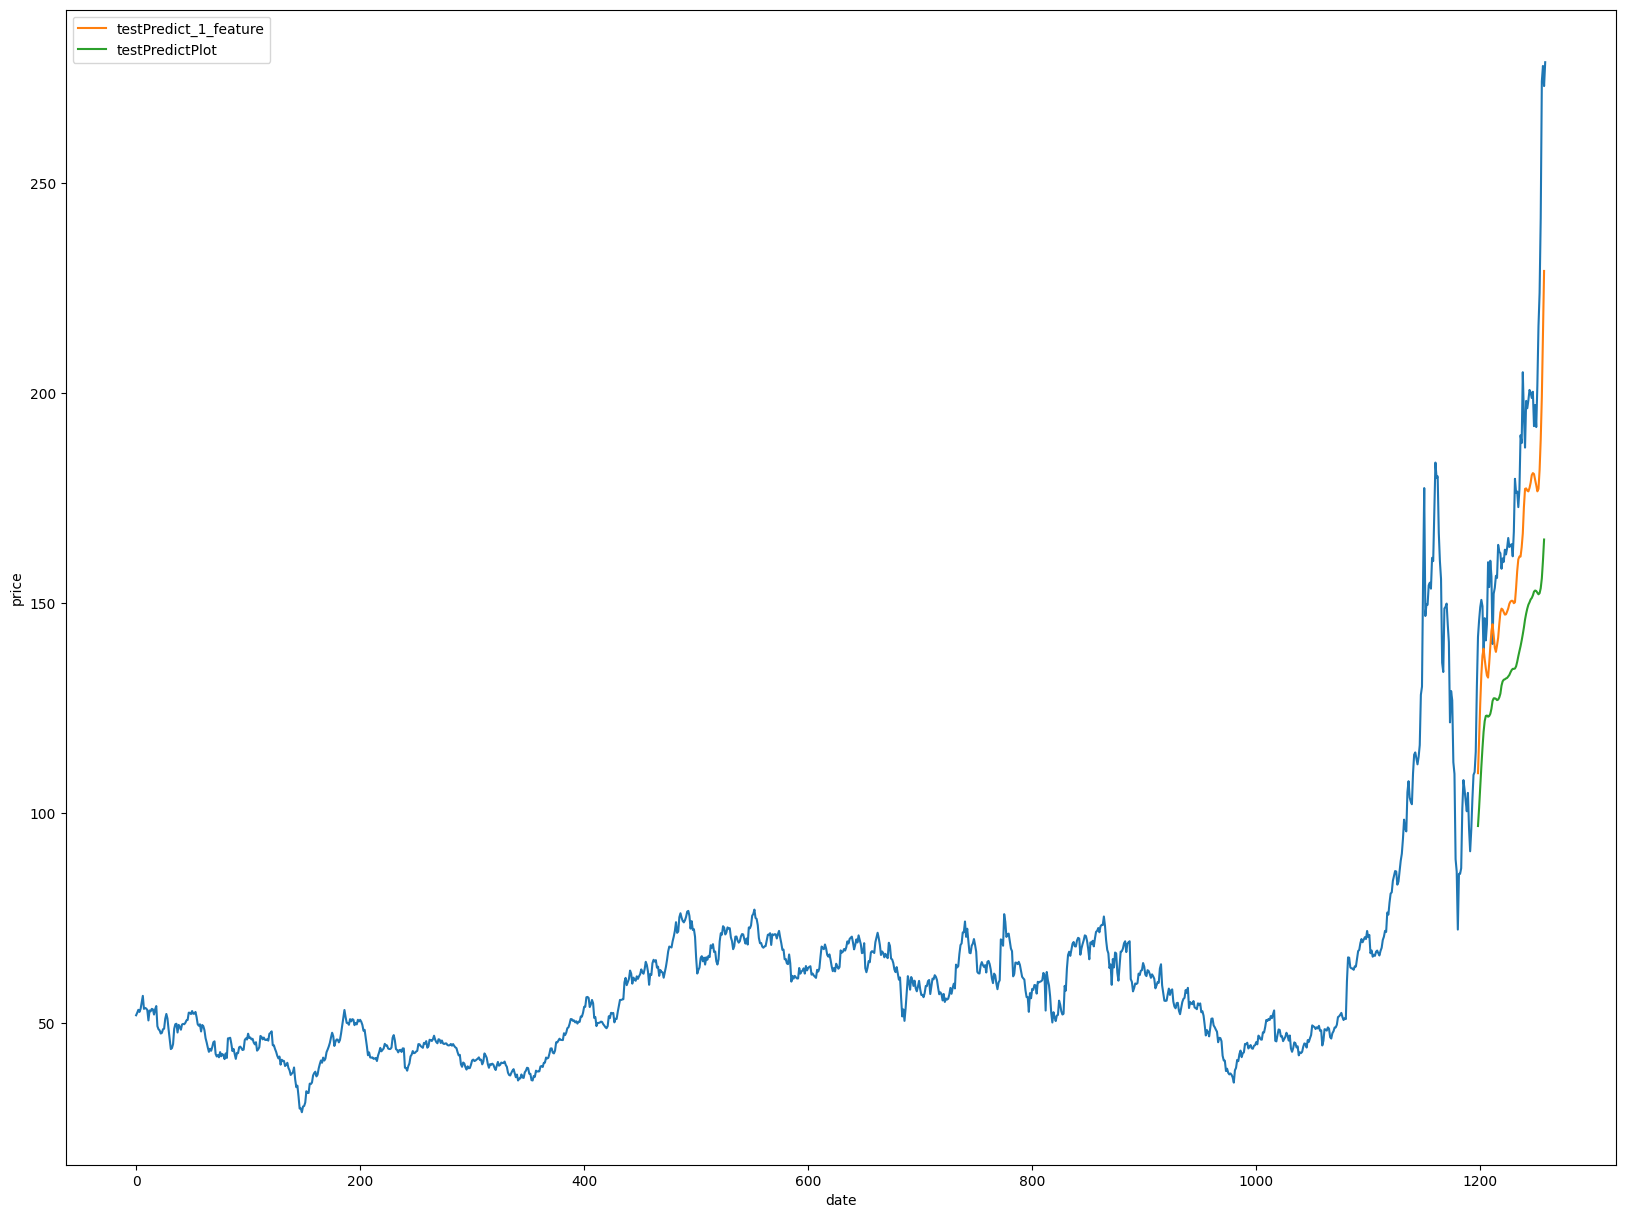

In [52]:
fig2 = plt.figure(figsize=(20, 15))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(np.arange(1198,1258),trainPredict_final,label='testPredict_1_feature')
plt.plot(np.arange(1198,1258),testPredict1,label='testPredictPlot')
plt.legend()
plt.ylabel('price')
plt.xlabel('date')
plt.show()

###Make 1 days' prediciton

In [112]:
dataset = dataframe.values
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset.reshape(-1, 1))
train = dataset[0: len(dataset)]
trainX, trainY = creat_dataset(train, 1)
model = Sequential()
model.add(LSTM(units=50,input_shape=(trainX.shape[1], 1),return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(300, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(100))
model.add(Dense(1, activation='relu'))
model.compile(loss='mean_squared_error', optimizer='Adam')
history = model.fit(trainX, trainY, batch_size=64, epochs=50, validation_split=0.1, verbose=2)

Epoch 1/50
18/18 - 9s - loss: 0.0040 - val_loss: 0.1838 - 9s/epoch - 522ms/step
Epoch 2/50
18/18 - 0s - loss: 0.0022 - val_loss: 0.1687 - 182ms/epoch - 10ms/step
Epoch 3/50
18/18 - 0s - loss: 0.0021 - val_loss: 0.1679 - 180ms/epoch - 10ms/step
Epoch 4/50
18/18 - 0s - loss: 0.0021 - val_loss: 0.1672 - 168ms/epoch - 9ms/step
Epoch 5/50
18/18 - 0s - loss: 0.0021 - val_loss: 0.1747 - 188ms/epoch - 10ms/step
Epoch 6/50
18/18 - 0s - loss: 0.0021 - val_loss: 0.1737 - 177ms/epoch - 10ms/step
Epoch 7/50
18/18 - 0s - loss: 0.0021 - val_loss: 0.1648 - 185ms/epoch - 10ms/step
Epoch 8/50
18/18 - 0s - loss: 0.0019 - val_loss: 0.1168 - 189ms/epoch - 11ms/step
Epoch 9/50
18/18 - 0s - loss: 5.9921e-04 - val_loss: 0.0019 - 172ms/epoch - 10ms/step
Epoch 10/50
18/18 - 0s - loss: 1.7255e-04 - val_loss: 0.0014 - 178ms/epoch - 10ms/step
Epoch 11/50
18/18 - 0s - loss: 1.3542e-04 - val_loss: 0.0033 - 215ms/epoch - 12ms/step
Epoch 12/50
18/18 - 0s - loss: 1.1492e-04 - val_loss: 0.0018 - 245ms/epoch - 14ms/step


In [113]:
dataset = dataframe.values
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset.reshape(-1, 1))
testX = dataset[-1:].reshape(1,1,1)
# print(testX)
testPres = []
# testPredict = model.predict(testX)
# print(testPredict)
for i in range(14):
  testPredict = model.predict(testX)
  testX = testPredict[0].reshape(1,1,1)
  testPredict = scaler.inverse_transform(testPredict)
  testPres = np.append(testPres,testPredict)

1/1 [==============================] - 0s 18ms/step


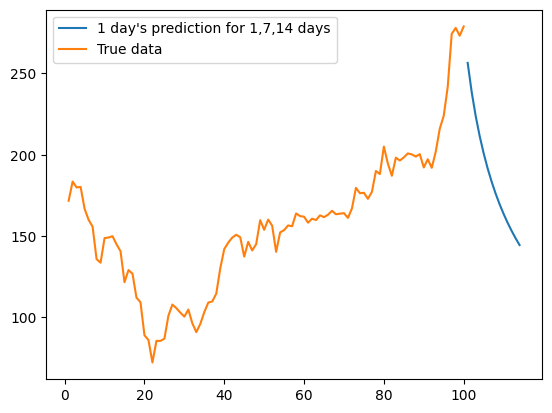

In [115]:
dataset = dataframe.values
plt.plot(np.arange(101,115),testPres,label = "1 day's prediction for 1,7,14 days")
plt.plot(np.arange(1,101),dataset[-100:],label = 'True data')
plt.legend()
plt.show()

###Use 1 day to predict 1 day later, with 14+14 days predictions totally.

In [78]:
dataset = dataframe.values
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset.reshape(-1, 1))
train_size = 1231
test_size = len(dataset)-1231
train, test = dataset[0: train_size], dataset[train_size: len(dataset)]
trainX, trainY = creat_dataset(train, 1)
testX, testY = creat_dataset(test, 1)
model = Sequential()
model.add(LSTM(units=50,input_shape=(trainX.shape[1], 1),return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(300, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(100))
model.add(Dense(1, activation='relu'))
model.compile(loss='mean_squared_error', optimizer='Adam')
history = model.fit(trainX, trainY, batch_size=64, epochs=50, validation_split=0.1, verbose=2)

Epoch 1/50
18/18 - 23s - loss: 0.0038 - val_loss: 0.1037 - 23s/epoch - 1s/step
Epoch 2/50
18/18 - 0s - loss: 0.0021 - val_loss: 0.0896 - 168ms/epoch - 9ms/step
Epoch 3/50
18/18 - 0s - loss: 0.0019 - val_loss: 0.0932 - 169ms/epoch - 9ms/step
Epoch 4/50
18/18 - 0s - loss: 0.0019 - val_loss: 0.0932 - 180ms/epoch - 10ms/step
Epoch 5/50
18/18 - 0s - loss: 0.0019 - val_loss: 0.0969 - 184ms/epoch - 10ms/step
Epoch 6/50
18/18 - 0s - loss: 0.0019 - val_loss: 0.0918 - 305ms/epoch - 17ms/step
Epoch 7/50
18/18 - 0s - loss: 0.0019 - val_loss: 0.0906 - 267ms/epoch - 15ms/step
Epoch 8/50
18/18 - 0s - loss: 0.0019 - val_loss: 0.0879 - 262ms/epoch - 15ms/step
Epoch 9/50
18/18 - 0s - loss: 0.0019 - val_loss: 0.0801 - 179ms/epoch - 10ms/step
Epoch 10/50
18/18 - 0s - loss: 0.0011 - val_loss: 0.0015 - 309ms/epoch - 17ms/step
Epoch 11/50
18/18 - 0s - loss: 2.3730e-04 - val_loss: 0.0065 - 260ms/epoch - 14ms/step
Epoch 12/50
18/18 - 0s - loss: 1.3563e-04 - val_loss: 0.0011 - 269ms/epoch - 15ms/step
Epoch 13/5

In [79]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict[:, 0]))
print('Train Sccore %.2f RMSE' %(trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict[:, 0]))
print('Train Sccore %.2f RMSE' %(testScore))

1/1 [==============================] - 0s 18ms/step
Train Sccore 2.92 RMSE
Train Sccore 12.95 RMSE


In [80]:
dataset = dataframe.values
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset.reshape(-1, 1))
testY = dataset[-14:]
testY = scaler.inverse_transform(testY)
testX = dataset[-29:-28].reshape(1,1,1)
# print(testX)
testPres = []
# testPredict = model.predict(testX)
# print(testPredict)
for i in range(28):
  testPredict = model.predict(testX)
  testX = testPredict[0].reshape(1,1,1)
  testPredict = scaler.inverse_transform(testPredict)
  testPres = np.append(testPres,testPredict)

1/1 [==============================] - 0s 21ms/step


In [81]:
print(testPres[-14:])
print(testY.reshape(-1,14))
testScore = math.sqrt(mean_squared_error(testY, testPres[-14:].reshape(14,1)))
print('Train Sccore %.2f RMSE' %(testScore))

testPres_1 = testPres
testScore_1 = testScore


[164.5725708  164.47612    164.38522339 164.29957581 164.21882629
 164.14271545 164.07096863 164.00331116 163.93952942 163.87939453
 163.82266235 163.76916504 163.71867371 163.67108154]
[[200.179993 198.863998 200.356003 192.169998 197.195999 191.947998
  201.869995 215.962006 223.925995 241.731995 274.31601  277.971985
  273.175995 278.855988]]
Train Sccore 71.05 RMSE


###Use 7 days to predict 7 days later, with 14+14 days predictions totally.

In [82]:
dataset = dataframe.values
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset.reshape(-1, 1))
train_size = 1231
test_size = len(dataset)-1231
train, test = dataset[0: train_size], dataset[train_size: len(dataset)]
trainX, trainY = creat_dataset(train, look_back)
testX, testY = creat_dataset(test, look_back)
model = Sequential()
model.add(LSTM(units=50,input_shape=(trainX.shape[1], 1),return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(300, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(100))
model.add(Dense(1, activation='relu'))
model.compile(loss='mean_squared_error', optimizer='Adam')
history = model.fit(trainX, trainY, batch_size=64, epochs=50, validation_split=0.1, verbose=2)

Epoch 1/50
18/18 - 9s - loss: 0.0030 - val_loss: 0.0742 - 9s/epoch - 512ms/step
Epoch 2/50
18/18 - 0s - loss: 0.0014 - val_loss: 0.0232 - 192ms/epoch - 11ms/step
Epoch 3/50
18/18 - 0s - loss: 3.6461e-04 - val_loss: 0.0150 - 196ms/epoch - 11ms/step
Epoch 4/50
18/18 - 0s - loss: 2.8810e-04 - val_loss: 0.0060 - 186ms/epoch - 10ms/step
Epoch 5/50
18/18 - 0s - loss: 2.6536e-04 - val_loss: 0.0050 - 183ms/epoch - 10ms/step
Epoch 6/50
18/18 - 0s - loss: 2.2446e-04 - val_loss: 0.0066 - 189ms/epoch - 10ms/step
Epoch 7/50
18/18 - 0s - loss: 2.3586e-04 - val_loss: 0.0049 - 183ms/epoch - 10ms/step
Epoch 8/50
18/18 - 0s - loss: 2.0675e-04 - val_loss: 0.0057 - 170ms/epoch - 9ms/step
Epoch 9/50
18/18 - 0s - loss: 2.1370e-04 - val_loss: 0.0055 - 221ms/epoch - 12ms/step
Epoch 10/50
18/18 - 0s - loss: 2.0704e-04 - val_loss: 0.0062 - 183ms/epoch - 10ms/step
Epoch 11/50
18/18 - 0s - loss: 2.0542e-04 - val_loss: 0.0063 - 186ms/epoch - 10ms/step
Epoch 12/50
18/18 - 0s - loss: 2.0867e-04 - val_loss: 0.0049 - 

In [83]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict[:, 0]))
print('Train Sccore %.2f RMSE' %(trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict[:, 0]))
print('Train Sccore %.2f RMSE' %(testScore))

1/1 [==============================] - 0s 20ms/step
Train Sccore 5.23 RMSE
Train Sccore 36.29 RMSE


In [84]:
dataset = dataframe.values
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset.reshape(-1, 1))
testY = dataset[-14:]
testY = scaler.inverse_transform(testY)
testX = dataset[-35:-28].reshape(1,7,1)
# print(testX)
testPres = []
# testPredict = model.predict(testX)
# print(testPredict)
for i in range(28):
  testPredict = model.predict(testX)
  testX = np.append(testX[0][-6:],testPredict[0]).reshape(1,7,1)
  testPredict = scaler.inverse_transform(testPredict)
  testPres = np.append(testPres,testPredict)

# testScore = math.sqrt(mean_squared_error(testY, testPredict[:, 0]))
# print('Train Sccore %.2f RMSE' %(testScore))



1/1 [==============================] - 0s 21ms/step


In [85]:
print(testPres[-14:])
print(testY.reshape(-1,7))
testScore = math.sqrt(mean_squared_error(testY, testPres[-14:].reshape(14,1)))
print('Train Sccore %.2f RMSE' %(testScore))
testPres_7 = testPres
testScore_7 = testScore

[106.08450317 103.88919067 101.79612732  99.80131531  97.90005493
  96.08672333  94.3558197   92.70230103  91.12152863  89.60977173
  88.16306305  86.77779388  85.45066833  84.17862701]
[[200.179993 198.863998 200.356003 192.169998 197.195999 191.947998
  201.869995]
 [215.962006 223.925995 241.731995 274.31601  277.971985 273.175995
  278.855988]]
Train Sccore 138.11 RMSE


###Use 14 days to predict 14 days later, with 14+14 days predictions totally.

In [86]:
dataset = dataframe.values
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset.reshape(-1, 1))
train_size = 1231
test_size = len(dataset)-1231
train, test = dataset[0: train_size], dataset[train_size: len(dataset)]
trainX, trainY = creat_dataset(train, 14)
testX, testY = creat_dataset(test, 14)
model = Sequential()
model.add(LSTM(units=50,input_shape=(trainX.shape[1], 1),return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(300, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(100))
model.add(Dense(1, activation='relu'))
model.compile(loss='mean_squared_error', optimizer='Adam')
history = model.fit(trainX, trainY, batch_size=64, epochs=50, validation_split=0.1, verbose=2)

Epoch 1/50
18/18 - 9s - loss: 0.0024 - val_loss: 0.0215 - 9s/epoch - 481ms/step
Epoch 2/50
18/18 - 0s - loss: 4.7783e-04 - val_loss: 0.0172 - 206ms/epoch - 11ms/step
Epoch 3/50
18/18 - 0s - loss: 3.7752e-04 - val_loss: 0.0114 - 318ms/epoch - 18ms/step
Epoch 4/50
18/18 - 0s - loss: 3.3390e-04 - val_loss: 0.0106 - 404ms/epoch - 22ms/step
Epoch 5/50
18/18 - 0s - loss: 3.1329e-04 - val_loss: 0.0082 - 286ms/epoch - 16ms/step
Epoch 6/50
18/18 - 0s - loss: 3.1668e-04 - val_loss: 0.0087 - 288ms/epoch - 16ms/step
Epoch 7/50
18/18 - 0s - loss: 2.9876e-04 - val_loss: 0.0094 - 374ms/epoch - 21ms/step
Epoch 8/50
18/18 - 0s - loss: 3.4098e-04 - val_loss: 0.0065 - 443ms/epoch - 25ms/step
Epoch 9/50
18/18 - 1s - loss: 3.7773e-04 - val_loss: 0.0083 - 565ms/epoch - 31ms/step
Epoch 10/50
18/18 - 0s - loss: 2.8039e-04 - val_loss: 0.0086 - 470ms/epoch - 26ms/step
Epoch 11/50
18/18 - 0s - loss: 2.5701e-04 - val_loss: 0.0059 - 361ms/epoch - 20ms/step
Epoch 12/50
18/18 - 0s - loss: 2.8741e-04 - val_loss: 0.01

In [87]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict[:, 0]))
print('Train Sccore %.2f RMSE' %(trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict[:, 0]))
print('Train Sccore %.2f RMSE' %(testScore))

1/1 [==============================] - 2s 2s/step
Train Sccore 6.01 RMSE
Train Sccore 47.30 RMSE


In [88]:
dataset = dataframe.values
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset.reshape(-1, 1))
testY = dataset[-14:]
testY = scaler.inverse_transform(testY)
testX = dataset[-42:-28].reshape(1,14,1)
# print(testX)
testPres = []
# testPredict = model.predict(testX)
# print(testPredict)
for i in range(28):
  testPredict = model.predict(testX)
  testX = np.append(testX[0][-13:],testPredict[0]).reshape(1,14,1)
  testPredict = scaler.inverse_transform(testPredict)
  testPres = np.append(testPres,testPredict)

# testScore = math.sqrt(mean_squared_error(testY, testPredict[:, 0]))
# print('Train Sccore %.2f RMSE' %(testScore))

1/1 [==============================] - 0s 23ms/step


In [89]:
print(testPres[-14:])
print(testY.reshape(-1,14))
testScore = math.sqrt(mean_squared_error(testY, testPres[-14:].reshape(14,1)))
print('Train Sccore %.2f RMSE' %(testScore))
testPres_14 = testPres
testScore_14 = testScore

[85.00772858 83.06627655 81.1998291  79.43399048 77.77069855 76.20334625
 74.72542572 73.33252716 72.02075195 70.78636169 69.62541962 68.53353882
 67.50658417 66.54048157]
[[200.179993 198.863998 200.356003 192.169998 197.195999 191.947998
  201.869995 215.962006 223.925995 241.731995 274.31601  277.971985
  273.175995 278.855988]]
Train Sccore 156.57 RMSE


###PLot with 1,7,14 days prediction

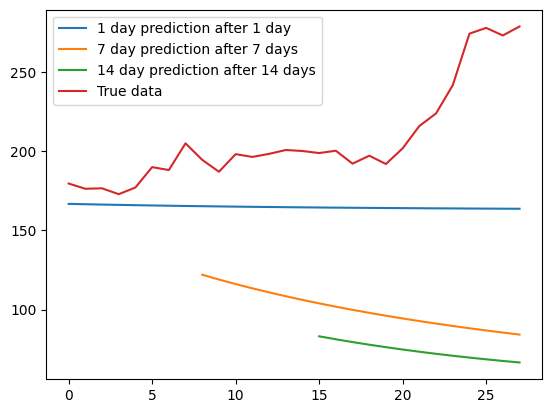

In [102]:
dataset = dataframe.values
# print(testPres_1.shape)
plt.plot(testPres_1,label = '1 day prediction after 1 day')
plt.plot(np.arange(8,28),testPres_7[8:],label = '7 day prediction after 7 days')
plt.plot(np.arange(15,28),testPres_14[15:],label = '14 day prediction after 14 days')
plt.plot(dataset[-28:],label = 'True data')
plt.legend()
plt.show()

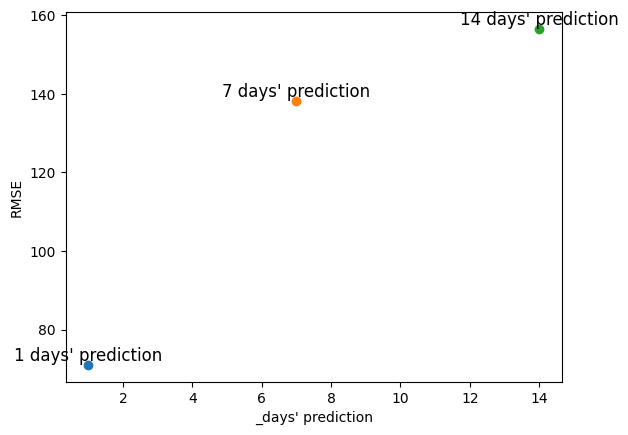

In [109]:
plt.scatter(1,testScore_1)
plt.scatter(7,testScore_7)
plt.scatter(14,testScore_14)
plt.text(1,testScore_1, "1 days' prediction", fontsize=12, ha='center', va='bottom')
plt.text(7,testScore_7, "7 days' prediction", fontsize=12, ha='center', va='bottom')
plt.text(14,testScore_14, "14 days' prediction", fontsize=12, ha='center', va='bottom')
plt.xlabel("_days' prediction")
plt.ylabel('RMSE')
plt.show()